## **`Cat vs Dog` classification — CNN implementation**

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

### keras - Generator >> for image fetching

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "../../DATASETS/animals/Train",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "../../DATASETS/animals/Test",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


as the image are storaed in the form of numpy array and the range it between 0-255 but with want it btween 0-1, so we have to nomalize it

### Normalizing

In [3]:
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### Create CNN model

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - accuracy: 0.7362 - loss: 2.4025 - val_accuracy: 0.5000 - val_loss: 11.8055
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.8863 - loss: 0.7572 - val_accuracy: 0.5000 - val_loss: 38.9098
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9225 - loss: 0.4026 - val_accuracy: 0.5000 - val_loss: 56.8206
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.9525 - loss: 0.2456 - val_accuracy: 0.5000 - val_loss: 59.7401
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.9625 - loss: 0.2542 - val_accuracy: 0.5000 - val_loss: 43.7140
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.9413 - loss: 0.4608 - val_accuracy: 0.5350 - val_loss: 17.5238
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.9638 - loss: 0.2786 - val_accuracy: 0.7250 - val_loss: 2.5572
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.9688 - loss: 0.2262 - val_accuracy: 0.8000 -

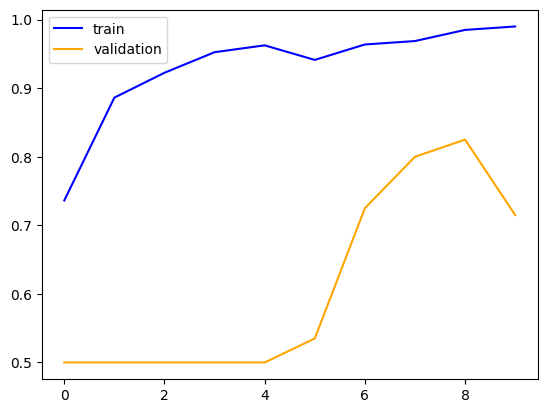

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()
plt.show()

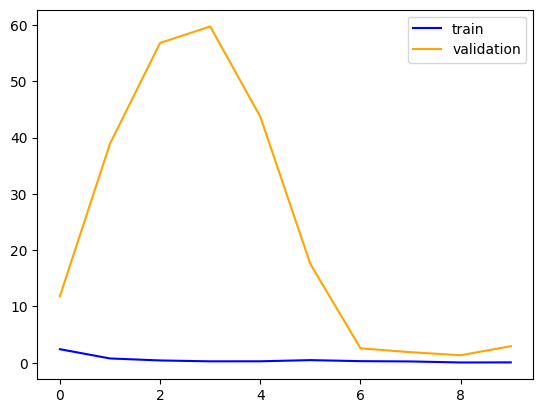

In [19]:
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')

plt.legend()
plt.show()

### Testing the Model

In [21]:
import cv2

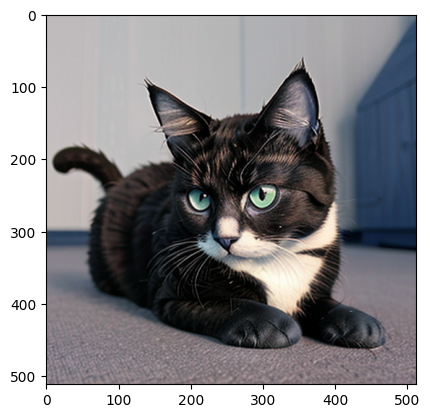

In [32]:
test_img = cv2.imread('../../DATASETS/animals/Test/cat/00310-200124620.png')
plt.imshow(test_img)

In [33]:
test_img.shape

(512, 512, 3)

In [34]:
test_img = cv2.resize(test_img, (256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.]], dtype=float32)